In this note, we numerically study the expansion of a surface code.
We first study the expansion without post-selection.

## Basic setup

In [1]:
import numpy as np
import stim
import matplotlib.pyplot as plt
import pymatching
import sinter
from typing import List
import surface_code as sc

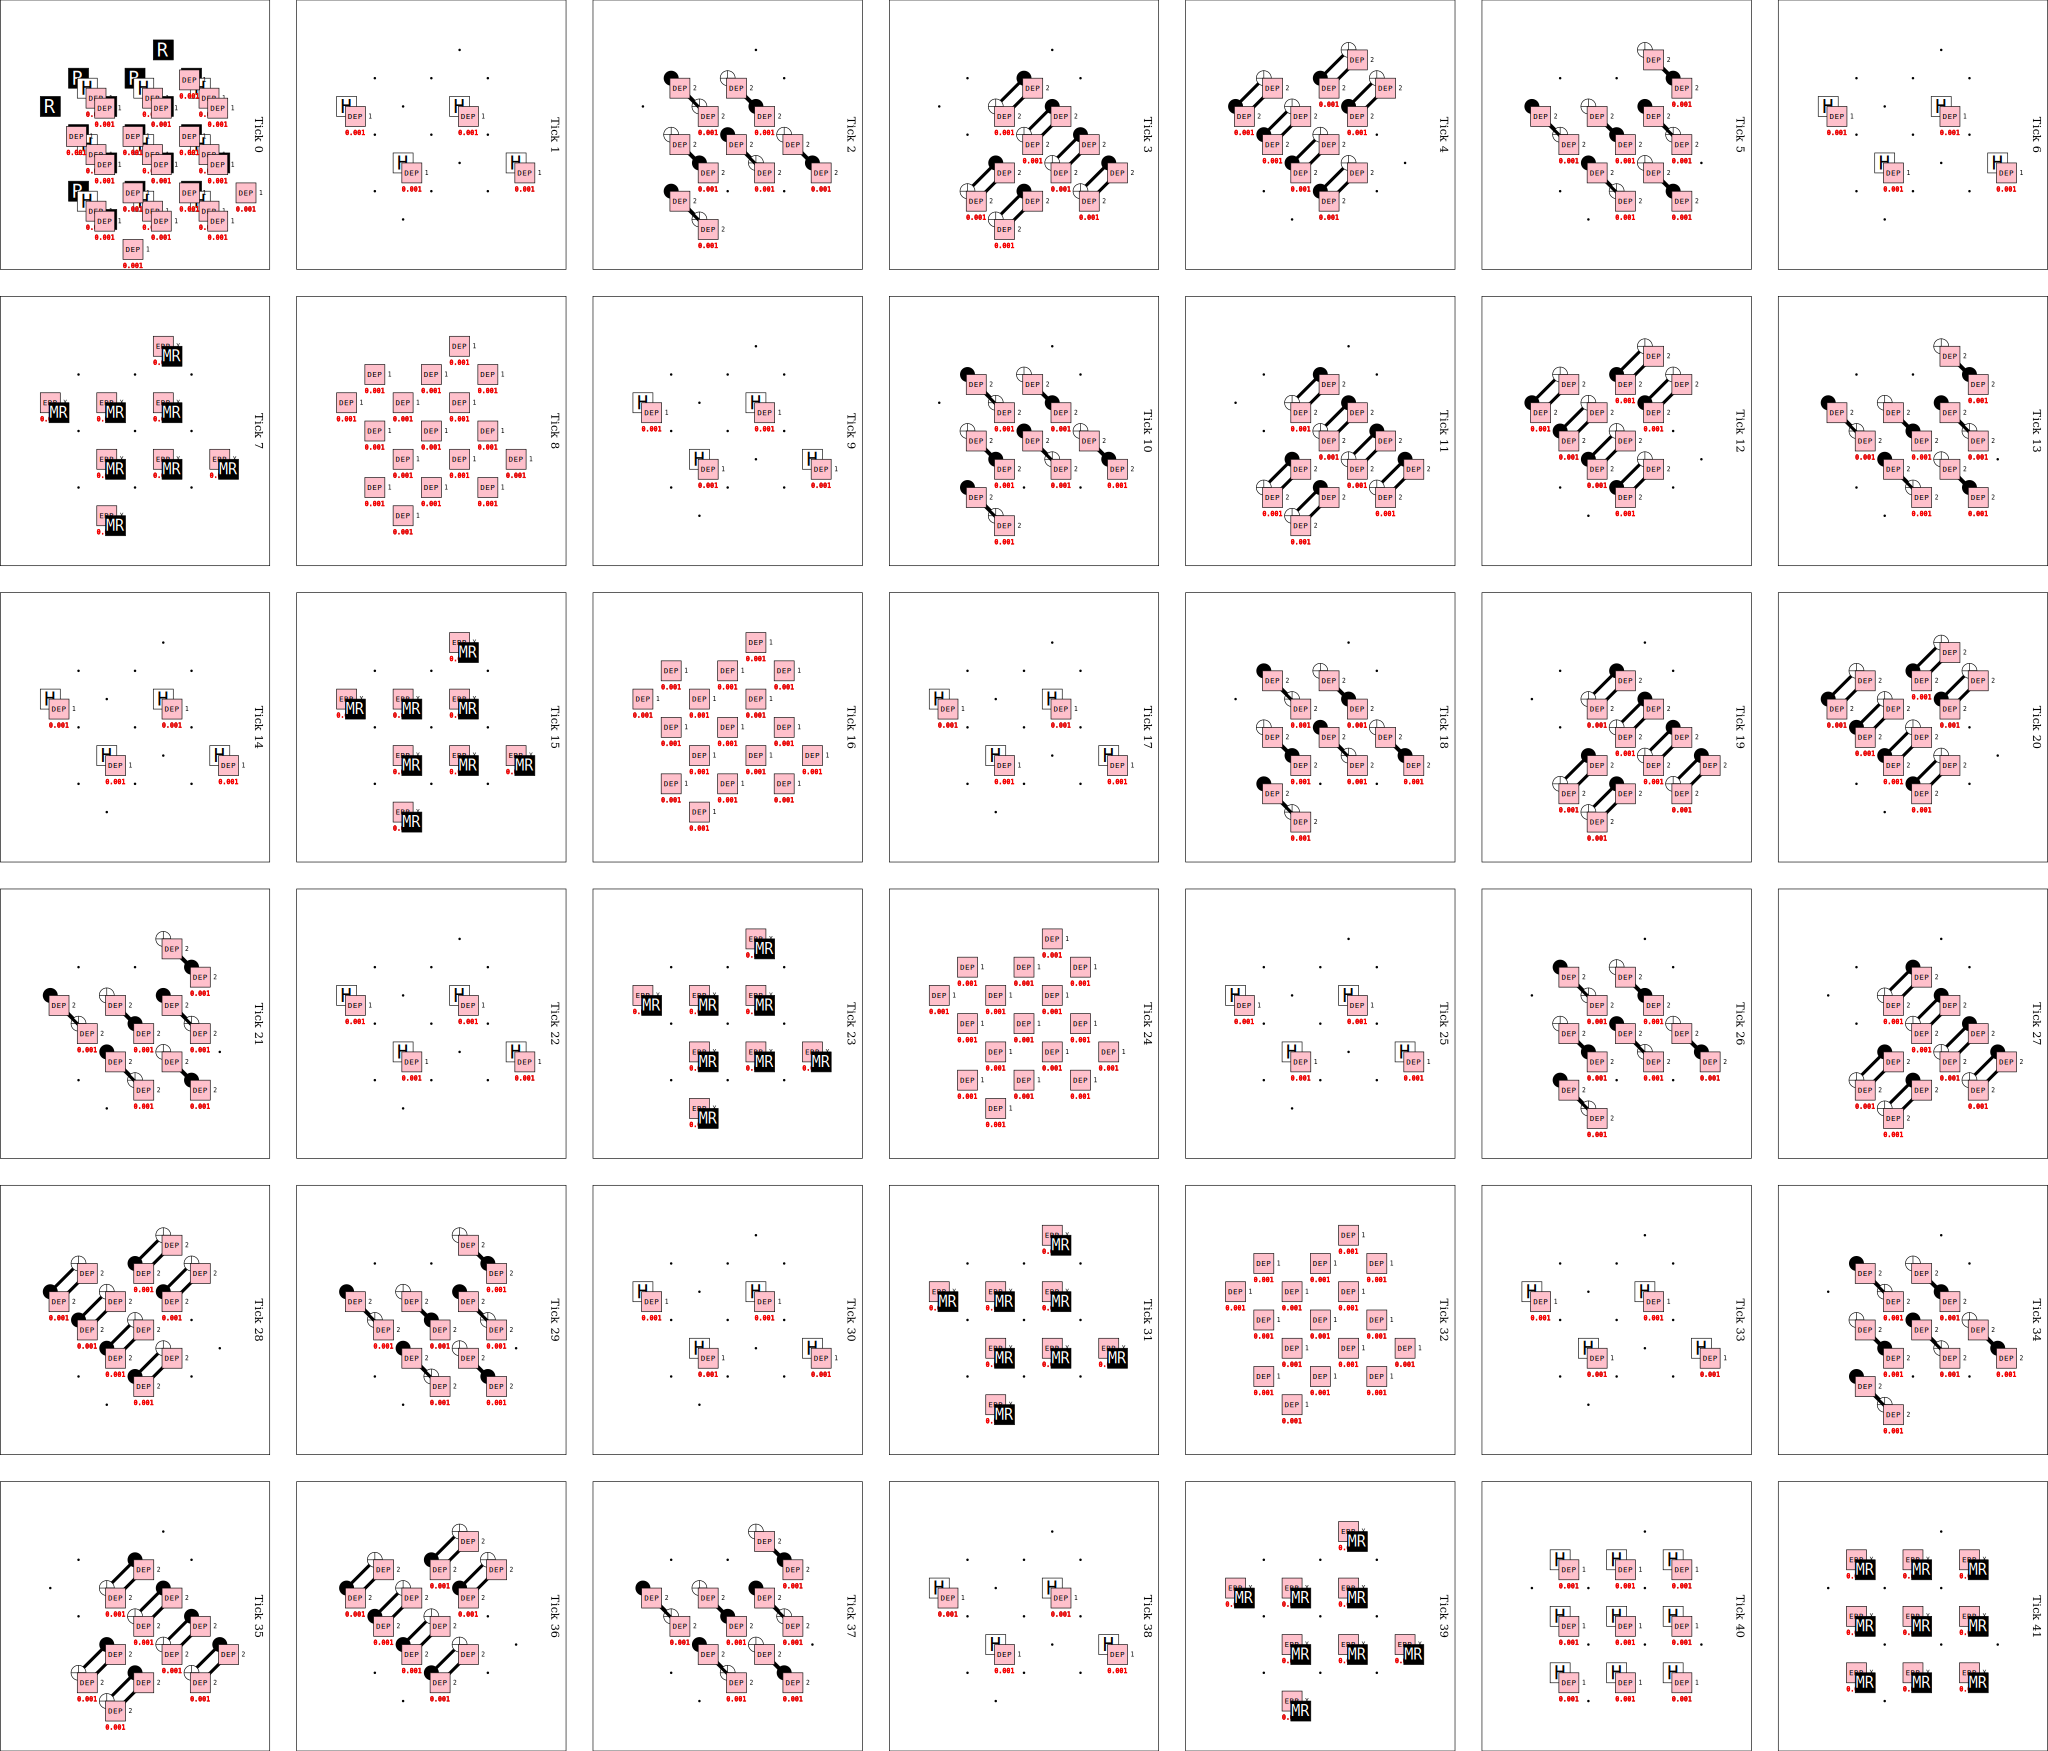

In [5]:
surface_code = sc.SurfaceCode(m=3, n=3, error_rate=0.001)
circuit = surface_code.circuit_standard('X',rounds=5)
circuit.diagram('timeslice-svg')

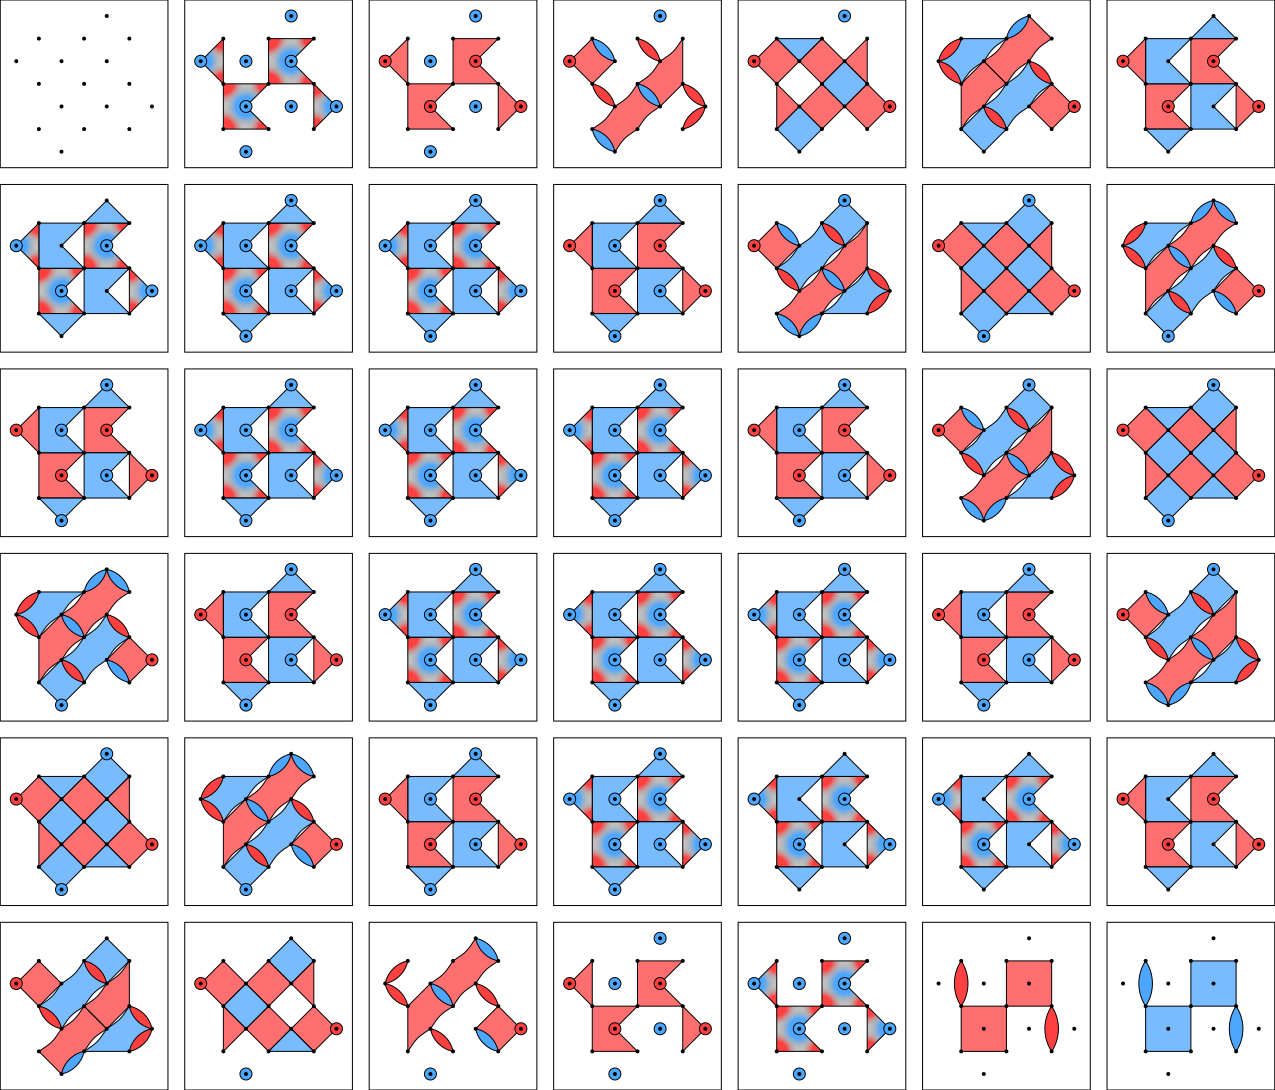

In [6]:
circuit.diagram('detslice-svg')

In [7]:
circuit.diagram('matchgraph-3d')

{"accessors":[{"bufferView":0,"byteOffset":0,"componentType":5126,"count":9,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":1,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0,0.400000005960464],"min":[-0.400000005960464,0,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":2,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0.400000005960464,0],"min":[-0.400000005960464,-0.400000005960464,0],"name":"circle_loop","type":"VEC3"},{"bufferView":3,"byteOffset":0,"componentType":5126,"count":9,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":4,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0,0.400000005960464],"min":[-0.400000005960464,0,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":5,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0.400000005960464,0],"min":[-0.400000005960464,-0.400000005960464,0],"name":"circle_loop","type":"VEC3"},{"bufferView":6,"byteOffset":0,"componentType":5126,"count":1908,"max":[24.3704261779785,24.3704261779785,23.7038822174072],"min":[-3.66666698455811,-12.3704252243042,-8.70388221740723],"name":"buf_scattered_lines","type":"VEC3"},{"bufferView":7,"byteOffset":0,"componentType":5126,"count":364,"max":[15.6666669845581,3,23.7038822174072],"min":[-12.3704252243042,-3.66666698455811,-8.70388221740723],"name":"buf_red_scattered_lines","type":"VEC3"}],"asset":{"version":"2.0"},"bufferViews":[{"buffer":0,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":1,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":2,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":3,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":4,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":5,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":6,"byteLength":22896,"byteOffset":0,"name":"buf_scattered_lines","target":34962},{"buffer":7,"byteLength":4368,"byteOffset":0,"name":"buf_red_scattered_lines","target":34962}],"buffers":[{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAM3MzD4AAAAAAAAAAMPQkD7D0JA+AAAAAPIwlrLNzMw+AAAAAMPQkL7D0JA+AAAAAM3MzL7yMBazAAAAAMHQkL7E0JC+AAAAAPLkozHNzMy+AAAAAMbQkD6/0JC+AAAAAM3MzD4AAAAA"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAAAAAADNzMw+w9CQPgAAAADD0JA+zczMPgAAAADyMJayw9CQPgAAAADD0JC+8jAWswAAAADNzMy+xNCQvgAAAADB0JC+zczMvgAAAADy5KMxv9CQvgAAAADG0JA+AAAAAAAAAADNzMw+"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,zczMPgAAAAAAAAAAw9CQPsPQkD4AAAAA8jCWss3MzD4AAAAAw9CQvsPQkD4AAAAAzczMvvIwFrMAAAAAwdCQvsTQkL4AAAAA8uSjMc3MzL4AAAAAxtCQPr/QkL4AAAAAzczMPgAAAAAAAAAA"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAM3MzD4AAAAAAAAAAMPQkD7D0JA+AAAAAPIwlrLNzMw+AAAAAMPQkL7D0JA+AAAAAM3MzL7yMBazAAAAAMHQkL7E0JC+AAAAAPLkozHNzMy+AAAAAMbQkD6/0JC+AAAAAM3MzD4AAAAA"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAAAAAADNzMw+w9CQPgAAAADD0JA+zczMPgAAAADyMJayw9CQPgAAAADD0JC+8jAWswAAAADNzMy+xNCQvgAAAADB0JC+zczMvgAAAADy5KMxv9CQvgAAAADG0JA+AAAAAAAAAADNzMw+"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,zczMPgAAAAAAAAAAw9CQPsPQkD4AAAAA8jCWss3MzD4AAAAAw9CQvsPQkD4AAAAAzczMvvIwFrMAAAAAwdCQvsTQkL4AAAAA8uSjMc3MzL4AAAAAxtCQPr/QkL4AAAAAzczMPgAAAAAAAAAA"},{"byteLength":22896,"name":"buf_scattered_lines","uri":"data:application/octet-stream;base64,AABAwAAAQEAAAAAAAABAQAAAEEEAAAAAAABAwAAAQEAAAAAAAABAwAAAQEAAAEBAAABAwAAAQEAAAAAAAABAwAAAQEAAAEBAAABAQAAAQEAAAEBAJOTsvyTk7L+O1YjAAABAwAAAQEAAAAAAAABAQAAAEEEAAEBAAABAwAAAQEAAAAAAAABAQAAAEEEA

## Grow the code without post-selection

In [1]:
import numpy as np
import stim
import matplotlib.pyplot as plt
import pymatching
import sinter
from typing import List
import surface_code as sc

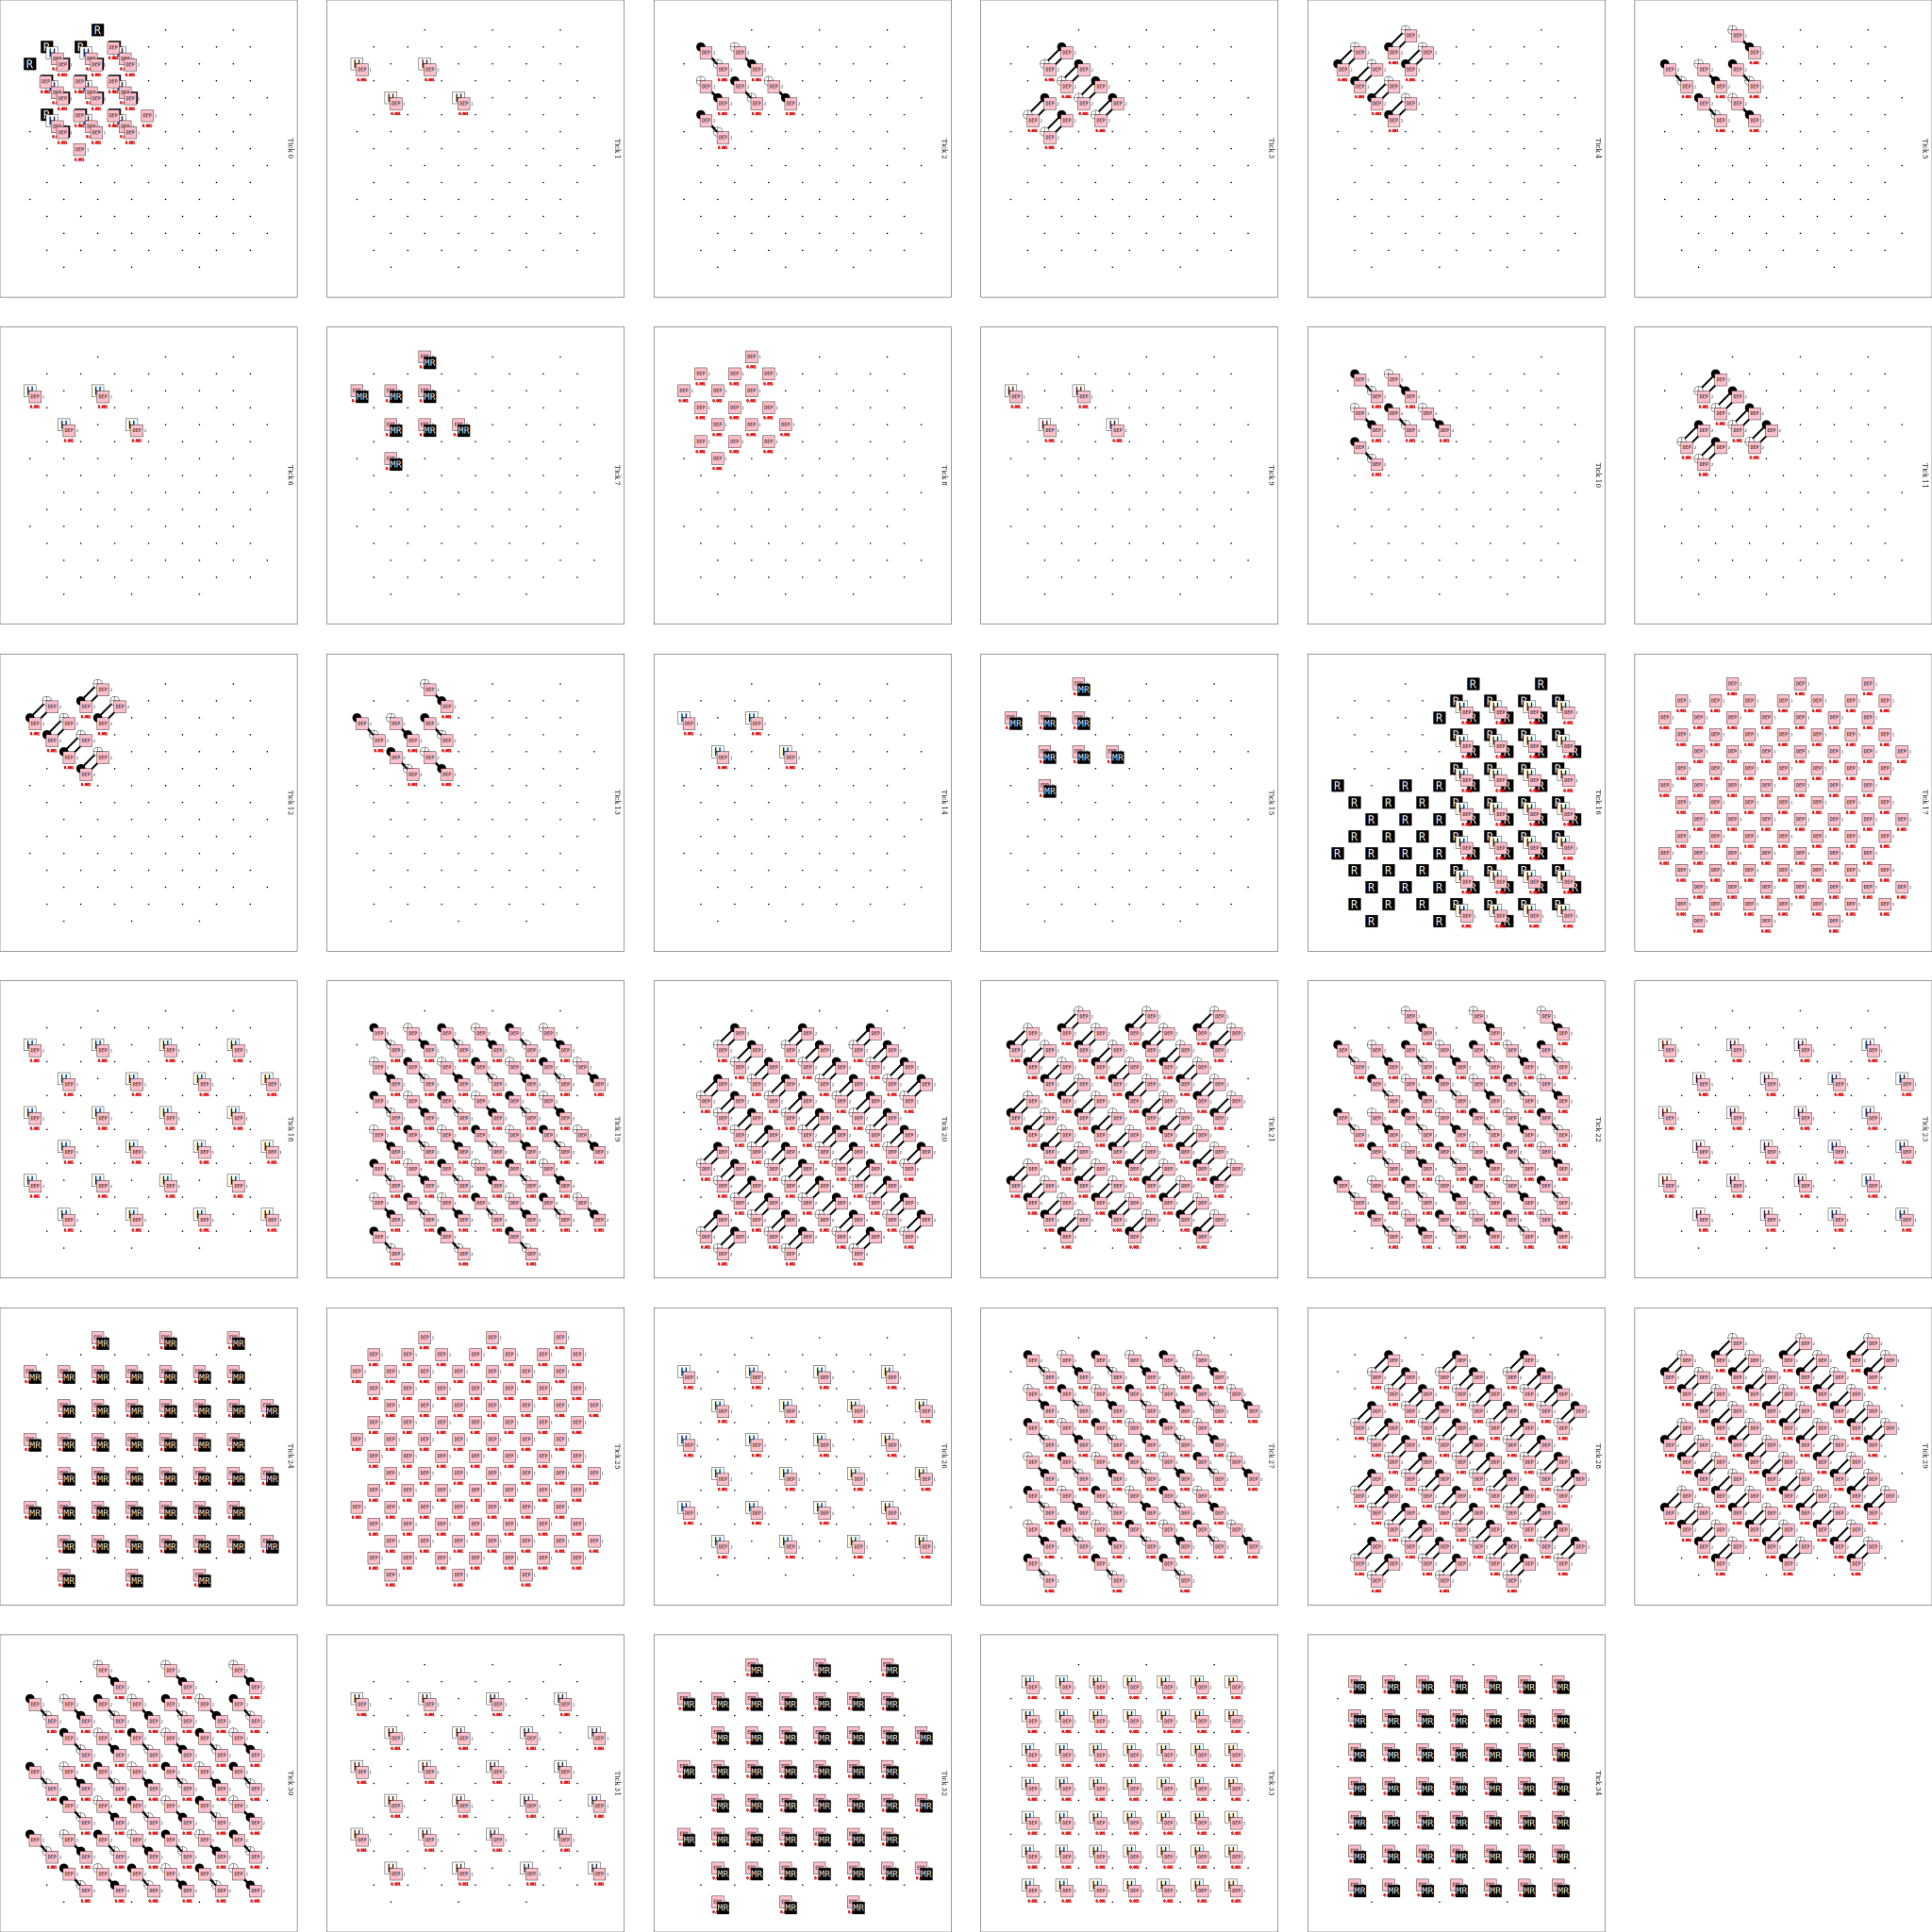

In [2]:
surface_code = sc.SurfaceCode(m=3, n=3, error_rate=0.001, off_set=50)
circuit = surface_code.circuit_standard(type='X', rounds=2, if_measure=False)
circuit = surface_code.grow_code(circuit, 2, 4, 7, 7, type='X', if_measure=True)
# save circuit to stim file
circuit.to_file("surface_code_expand.stim")
circuit.diagram('timeslice-svg')

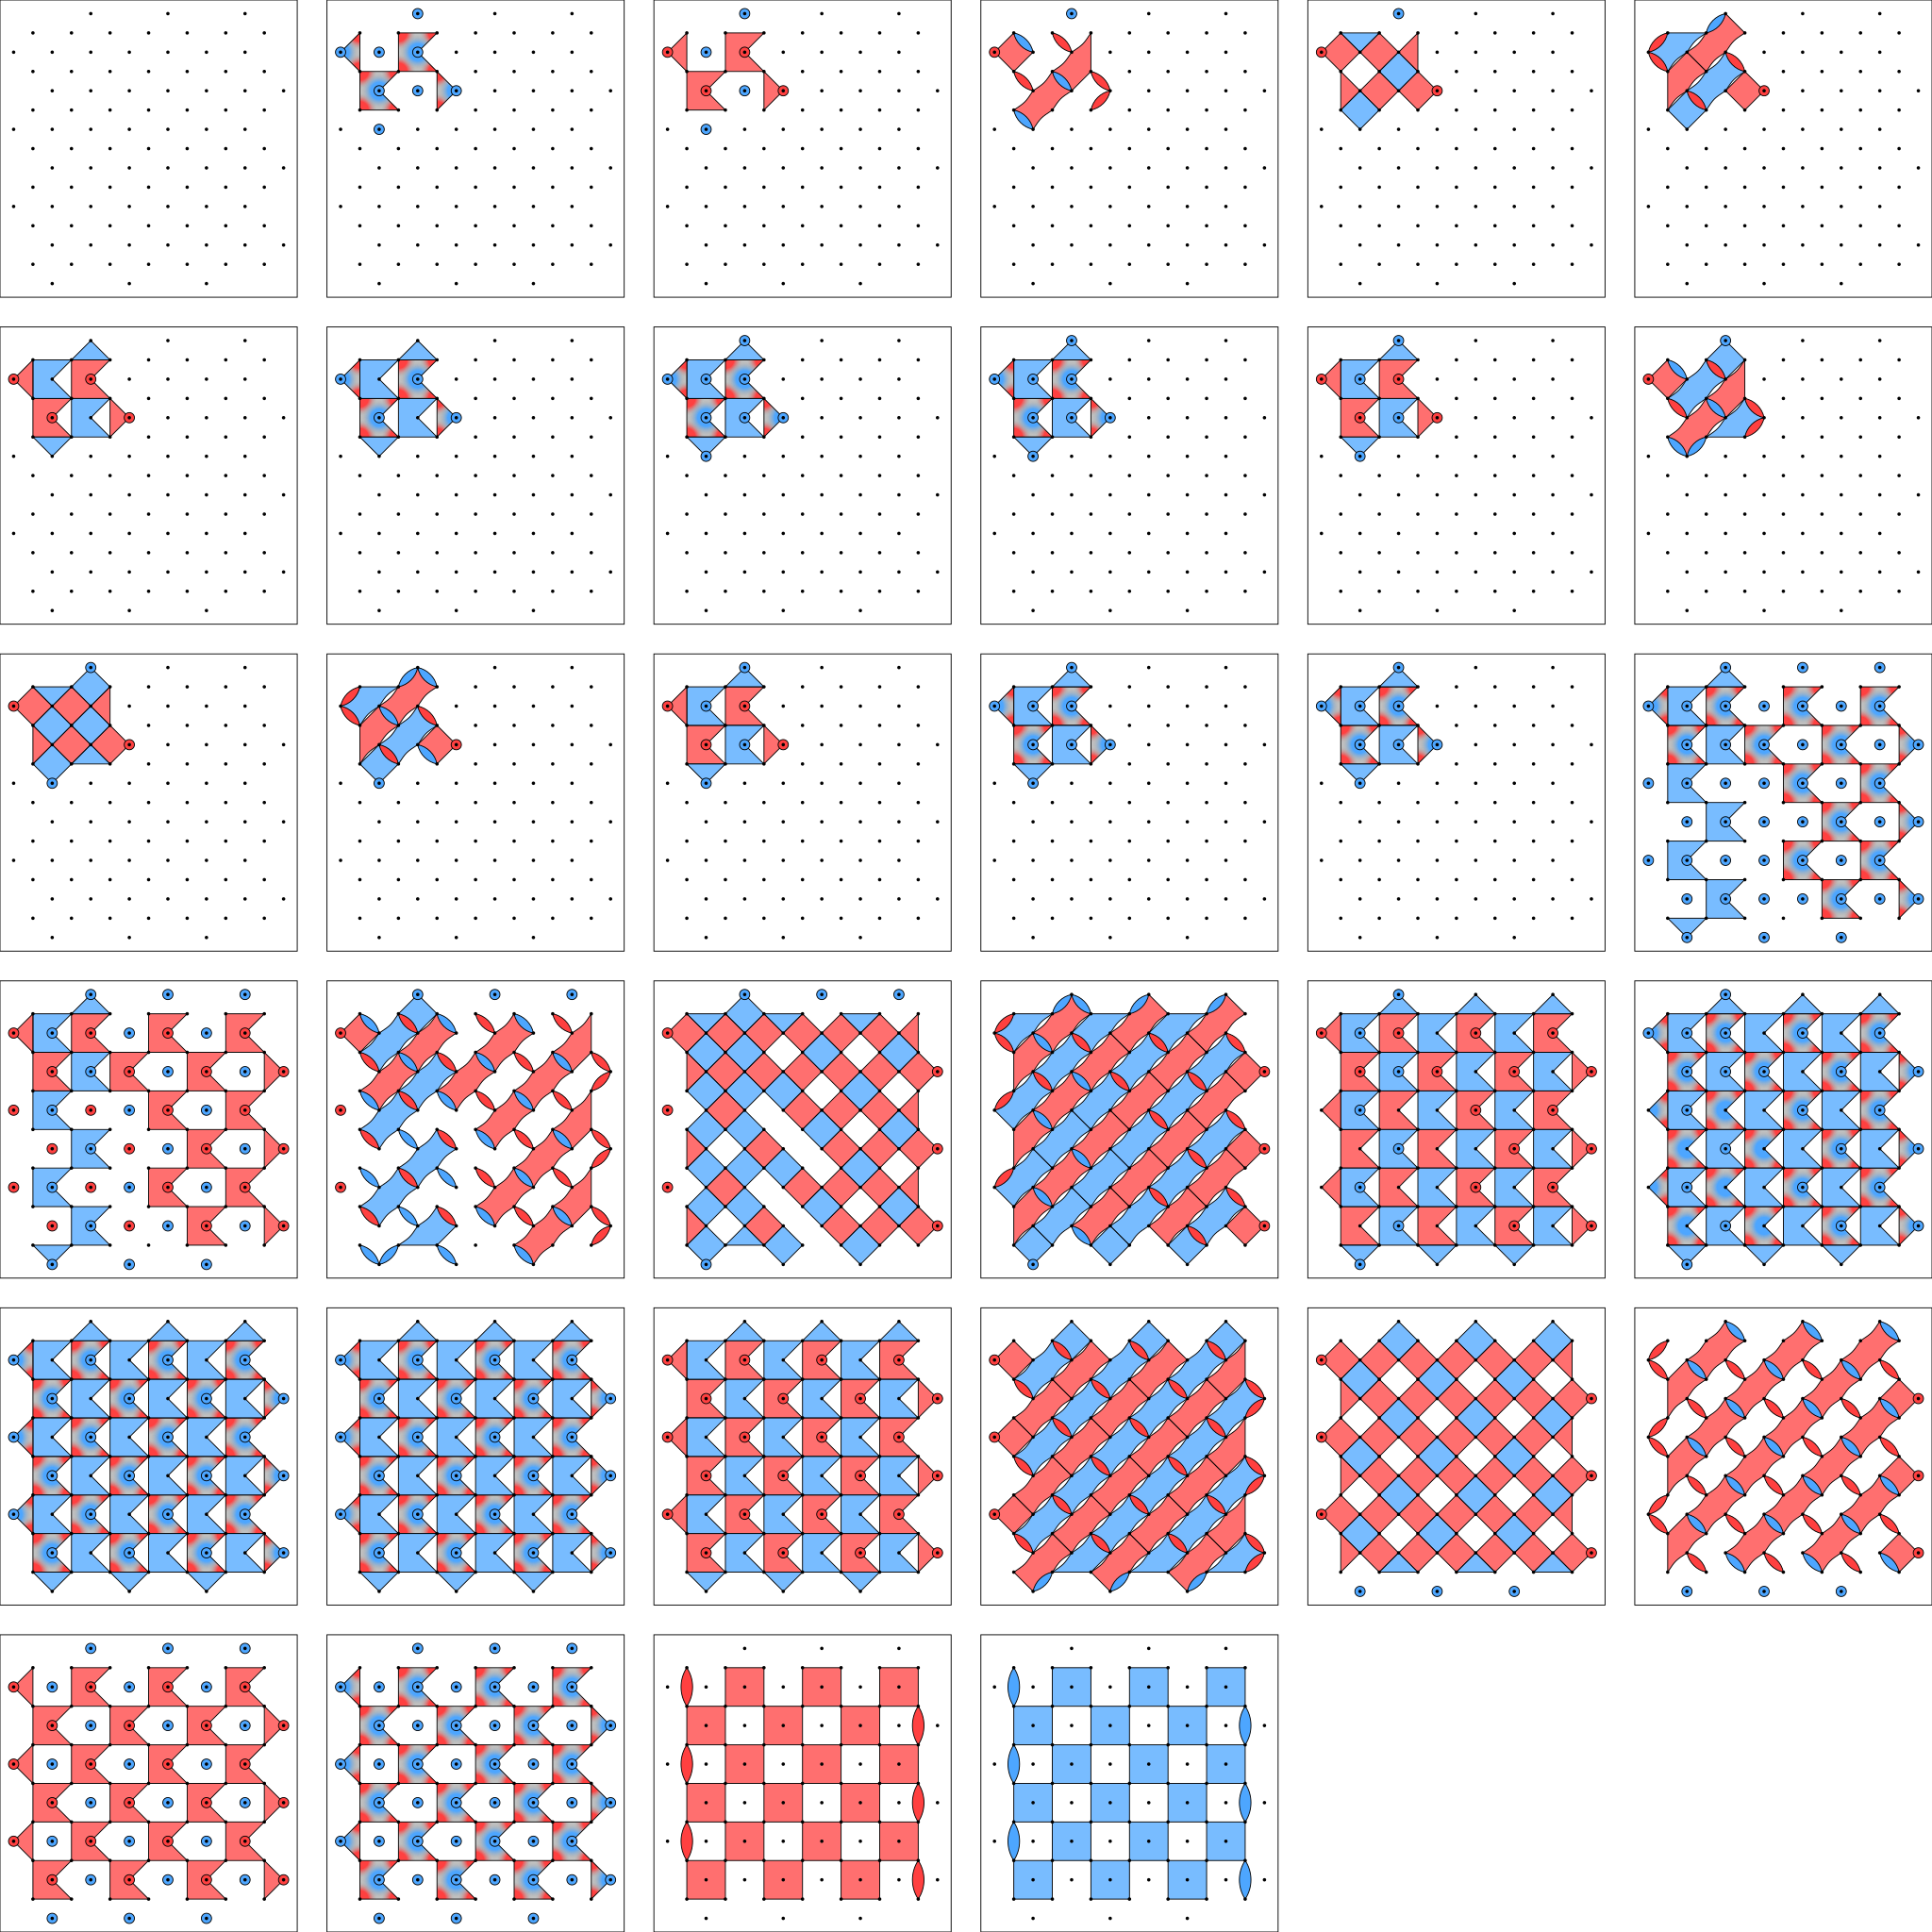

In [3]:
circuit.diagram('detslice-svg')

In [4]:
circuit.diagram('matchgraph-3d')

{"accessors":[{"bufferView":0,"byteOffset":0,"componentType":5126,"count":9,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":1,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0,0.400000005960464],"min":[-0.400000005960464,0,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":2,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0.400000005960464,0],"min":[-0.400000005960464,-0.400000005960464,0],"name":"circle_loop","type":"VEC3"},{"bufferView":3,"byteOffset":0,"componentType":5126,"count":9,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":4,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0,0.400000005960464],"min":[-0.400000005960464,0,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":5,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0.400000005960464,0],"min":[-0.400000005960464,-0.400000005960464,0],"name":"circle_loop","type":"VEC3"},{"bufferView":6,"byteOffset":0,"componentType":5126,"count":5512,"max":[47.137336730957,48.8019599914551,15.6514835357666],"min":[-12.8019609451294,-12.8019609451294,-5.34522485733032],"name":"buf_scattered_lines","type":"VEC3"},{"bufferView":7,"byteOffset":0,"componentType":5126,"count":458,"max":[40.0710678100586,3,15.6514835357666],"min":[-11.1373348236084,-6.80580711364746,-3.24442839622498],"name":"buf_red_scattered_lines","type":"VEC3"}],"asset":{"version":"2.0"},"bufferViews":[{"buffer":0,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":1,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":2,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":3,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":4,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":5,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":6,"byteLength":66144,"byteOffset":0,"name":"buf_scattered_lines","target":34962},{"buffer":7,"byteLength":5496,"byteOffset":0,"name":"buf_red_scattered_lines","target":34962}],"buffers":[{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAM3MzD4AAAAAAAAAAMPQkD7D0JA+AAAAAPIwlrLNzMw+AAAAAMPQkL7D0JA+AAAAAM3MzL7yMBazAAAAAMHQkL7E0JC+AAAAAPLkozHNzMy+AAAAAMbQkD6/0JC+AAAAAM3MzD4AAAAA"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAAAAAADNzMw+w9CQPgAAAADD0JA+zczMPgAAAADyMJayw9CQPgAAAADD0JC+8jAWswAAAADNzMy+xNCQvgAAAADB0JC+zczMvgAAAADy5KMxv9CQvgAAAADG0JA+AAAAAAAAAADNzMw+"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,zczMPgAAAAAAAAAAw9CQPsPQkD4AAAAA8jCWss3MzD4AAAAAw9CQvsPQkD4AAAAAzczMvvIwFrMAAAAAwdCQvsTQkL4AAAAA8uSjMc3MzL4AAAAAxtCQPr/QkL4AAAAAzczMPgAAAAAAAAAA"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAM3MzD4AAAAAAAAAAMPQkD7D0JA+AAAAAPIwlrLNzMw+AAAAAMPQkL7D0JA+AAAAAM3MzL7yMBazAAAAAMHQkL7E0JC+AAAAAPLkozHNzMy+AAAAAMbQkD6/0JC+AAAAAM3MzD4AAAAA"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAAAAAADNzMw+w9CQPgAAAADD0JA+zczMPgAAAADyMJayw9CQPgAAAADD0JC+8jAWswAAAADNzMy+xNCQvgAAAADB0JC+zczMvgAAAADy5KMxv9CQvgAAAADG0JA+AAAAAAAAAADNzMw+"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,zczMPgAAAAAAAAAAw9CQPsPQkD4AAAAA8jCWss3MzD4AAAAAw9CQvsPQkD4AAAAAzczMvvIwFrMAAAAAwdCQvsTQkL4AAAAA8uSjMc3MzL4AAAAAxtCQPr/QkL4AAAAAzczMPgAAAAAAAAAA"},{"byteLength":66144,"name":"buf_scattered_lines","uri":"data:application/octet-stream;base64,AABAwAAAQEAAAAAAAABAQAAAEEEAAAAAAABAwAAAQEAAAAAAAABAwAAAQEAAAEBAAABAwAAAQEAAAAAAAABAwAAAQEAAAEBAAABAQAAAQEAAAEBAeAuAwHgLgMCgw8w/AABAwAAAQEAAAAAAAABAQAAAEEEAAEBAAABAwAAAQEAAAAAAAABAQAAAEEEAA

In [6]:
import time, pickle

def circuit_to_simulate(T3, T5, t, noise):
    surface_code = sc.SurfaceCode(3, 3, noise)
    if t <= T3:
        circuit = surface_code.circuit_standard(type='X', rounds=t)
    elif t <= T5:
        circuit = surface_code.circuit_standard(type='X', rounds=T3, if_measure=False)
        circuit = surface_code.grow_code(circuit, T3, t, 5, 5, type='X', if_measure=True)
    else:
        circuit = surface_code.circuit_standard(type='X', rounds=T3, if_measure=False)
        circuit = surface_code.grow_code(circuit, T3, T5, 5, 5, type='X', if_measure=False)
        circuit = surface_code.grow_code(circuit, T5, t, 7, 7, type='X', if_measure=True)

    return circuit

T3 = 10
T5 = 20
noise = 0.001

tasks = [
    sinter.Task(
        circuit = circuit_to_simulate(T3, T5, t, noise),
        json_metadata={'t': t}
    )
    for t in range(1, 30, 2)
]

collected_stats: List[sinter.TaskStats] = sinter.collect(
    num_workers=16,
    tasks=tasks,
    decoders=['pymatching'],
    max_shots=1_000_000,
    max_errors=5000,
)

unique_id = int(time.time() * 1000)
filename = f"data/sfc_expd_357_{unique_id}.pkl"
with open(filename, "wb") as f:
    pickle.dump(collected_stats, f)
print("Saved stats to", filename)

Saved stats to data/sfc_expd_357_1758280421143.pkl


In [7]:
filepath = "data/sfc_expd_357_1758275078792.pkl"
try:
    with open(filepath, "rb") as fp:
        collected_stats_expd = pickle.load(fp)
    print(f"Loaded {len(collected_stats_expd)} entries from {filepath}")
    print(collected_stats_expd)
except FileNotFoundError:
    print(f"File not found: {filepath}")

Loaded 15 entries from data/sfc_expd_357_1758275078792.pkl
[sinter.TaskStats(strong_id='42dccbaf29b0b6cbe99e0d14e3ea664a80fb5655ed5101e18e8db47437840f24', decoder='pymatching', json_metadata={'t': 3}, shots=1000000, errors=935, seconds=0.44659012416377664), sinter.TaskStats(strong_id='bf4eb74fcccb4282f2b261ad148a6caa518609a9676c779589ebb14593aa75fc', decoder='pymatching', json_metadata={'t': 7}, shots=1000000, errors=1900, seconds=0.45659800060093403), sinter.TaskStats(strong_id='bf0334d9624cb51f351a90e5d4e504c67017b1c7b9feed158a5d4b22ed27ecd6', decoder='pymatching', json_metadata={'t': 5}, shots=1000000, errors=1409, seconds=0.3739865426905453), sinter.TaskStats(strong_id='27886cff6dd1a7ef992bd11d8207fe3c4be1437a3051e7bb72988920b898698f', decoder='pymatching', json_metadata={'t': 1}, shots=1000000, errors=357, seconds=0.23585804319009185), sinter.TaskStats(strong_id='3a4404ea7ea6377c427a733855bc7fe2345ad9365769af45db01da6182989da7', decoder='pymatching', json_metadata={'t': 9}, shots=

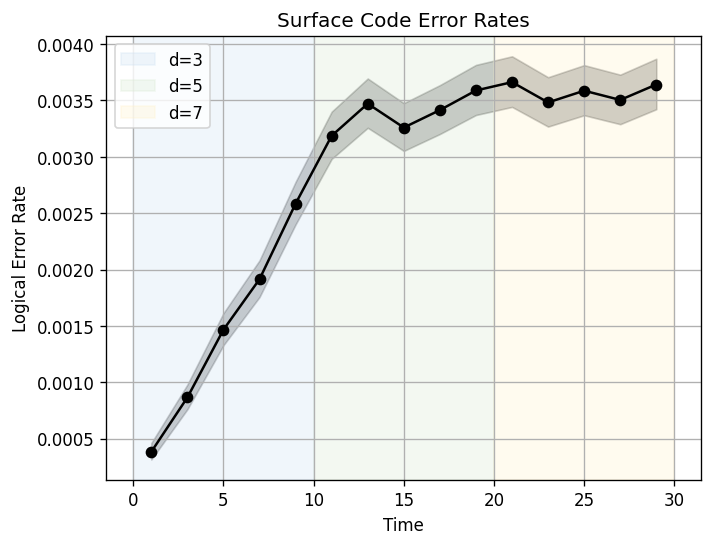

In [7]:
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_stats,
    x_func=lambda stats: stats.json_metadata['t'],
)
# ax.set_ylim(1e-6, 5e-1)
# ax.set_xlim(5e-4, 1e-2)
ax.set_title("Surface Code Error Rates")
ax.set_xlabel("Time")
ax.set_ylabel("Logical Error Rate")
ax.grid(which='major')
ax.grid(which='minor')
# ax.set_xscale("log")
# ax.set_yscale("log")
for x0, x1, d, color in [
    (0, T3, 3, '#cfe2f3'),
    (T3, T5, 5, '#d9ead3'),
    (T5, 30, 7, '#fff2cc'),
]:
    ax.axvspan(x0, x1, color=color, alpha=0.3, label=f'd={d}', zorder=0)
ax.legend()
fig.set_dpi(120)  # Show it bigger

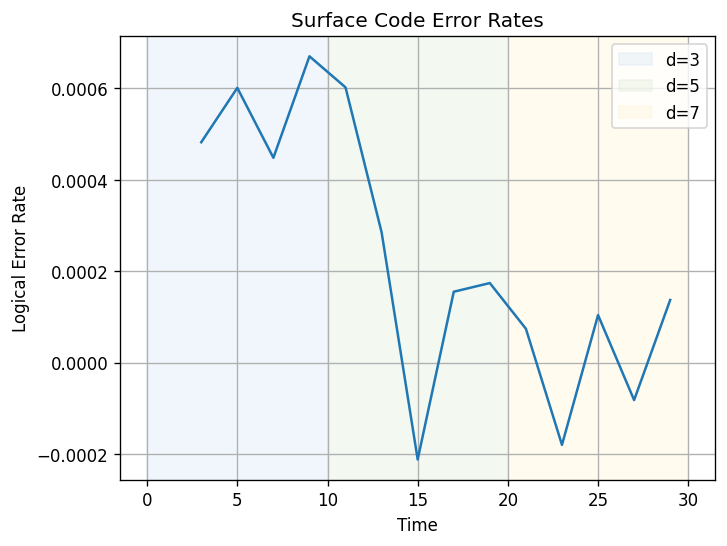

In [8]:
fig, ax = plt.subplots(1, 1)
collected_stats = sorted(collected_stats, key=lambda s: s.json_metadata['t'])
error_rate_per_round = [(collected_stats[i].errors / collected_stats[i].shots - collected_stats[i-1].errors / collected_stats[i-1].shots) for i in range(1, len(collected_stats))]
t = [collected_stats[i].json_metadata['t'] for i in range(1, len(collected_stats))]

ax.plot(t, error_rate_per_round)
# ax.set_ylim(1e-6, 5e-1)
# ax.set_xlim(5e-4, 1e-2)
ax.set_title("Surface Code Error Rates")
ax.set_xlabel("Time")
ax.set_ylabel("Logical Error Rate")
ax.grid(which='major')
ax.grid(which='minor')
# ax.set_xscale("log")
# ax.set_yscale("log")
for x0, x1, d, color in [
    (0, T3, 3, '#cfe2f3'),
    (T3, T5, 5, '#d9ead3'),
    (T5, 30, 7, '#fff2cc'),
]:
    ax.axvspan(x0, x1, color=color, alpha=0.3, label=f'd={d}', zorder=0)
ax.legend()
fig.set_dpi(120)  # Show it bigger

## Preserving S state without post-selection

In [1]:
import numpy as np
import stim
import matplotlib.pyplot as plt
import pymatching
import sinter
from typing import List
import surface_code as sc

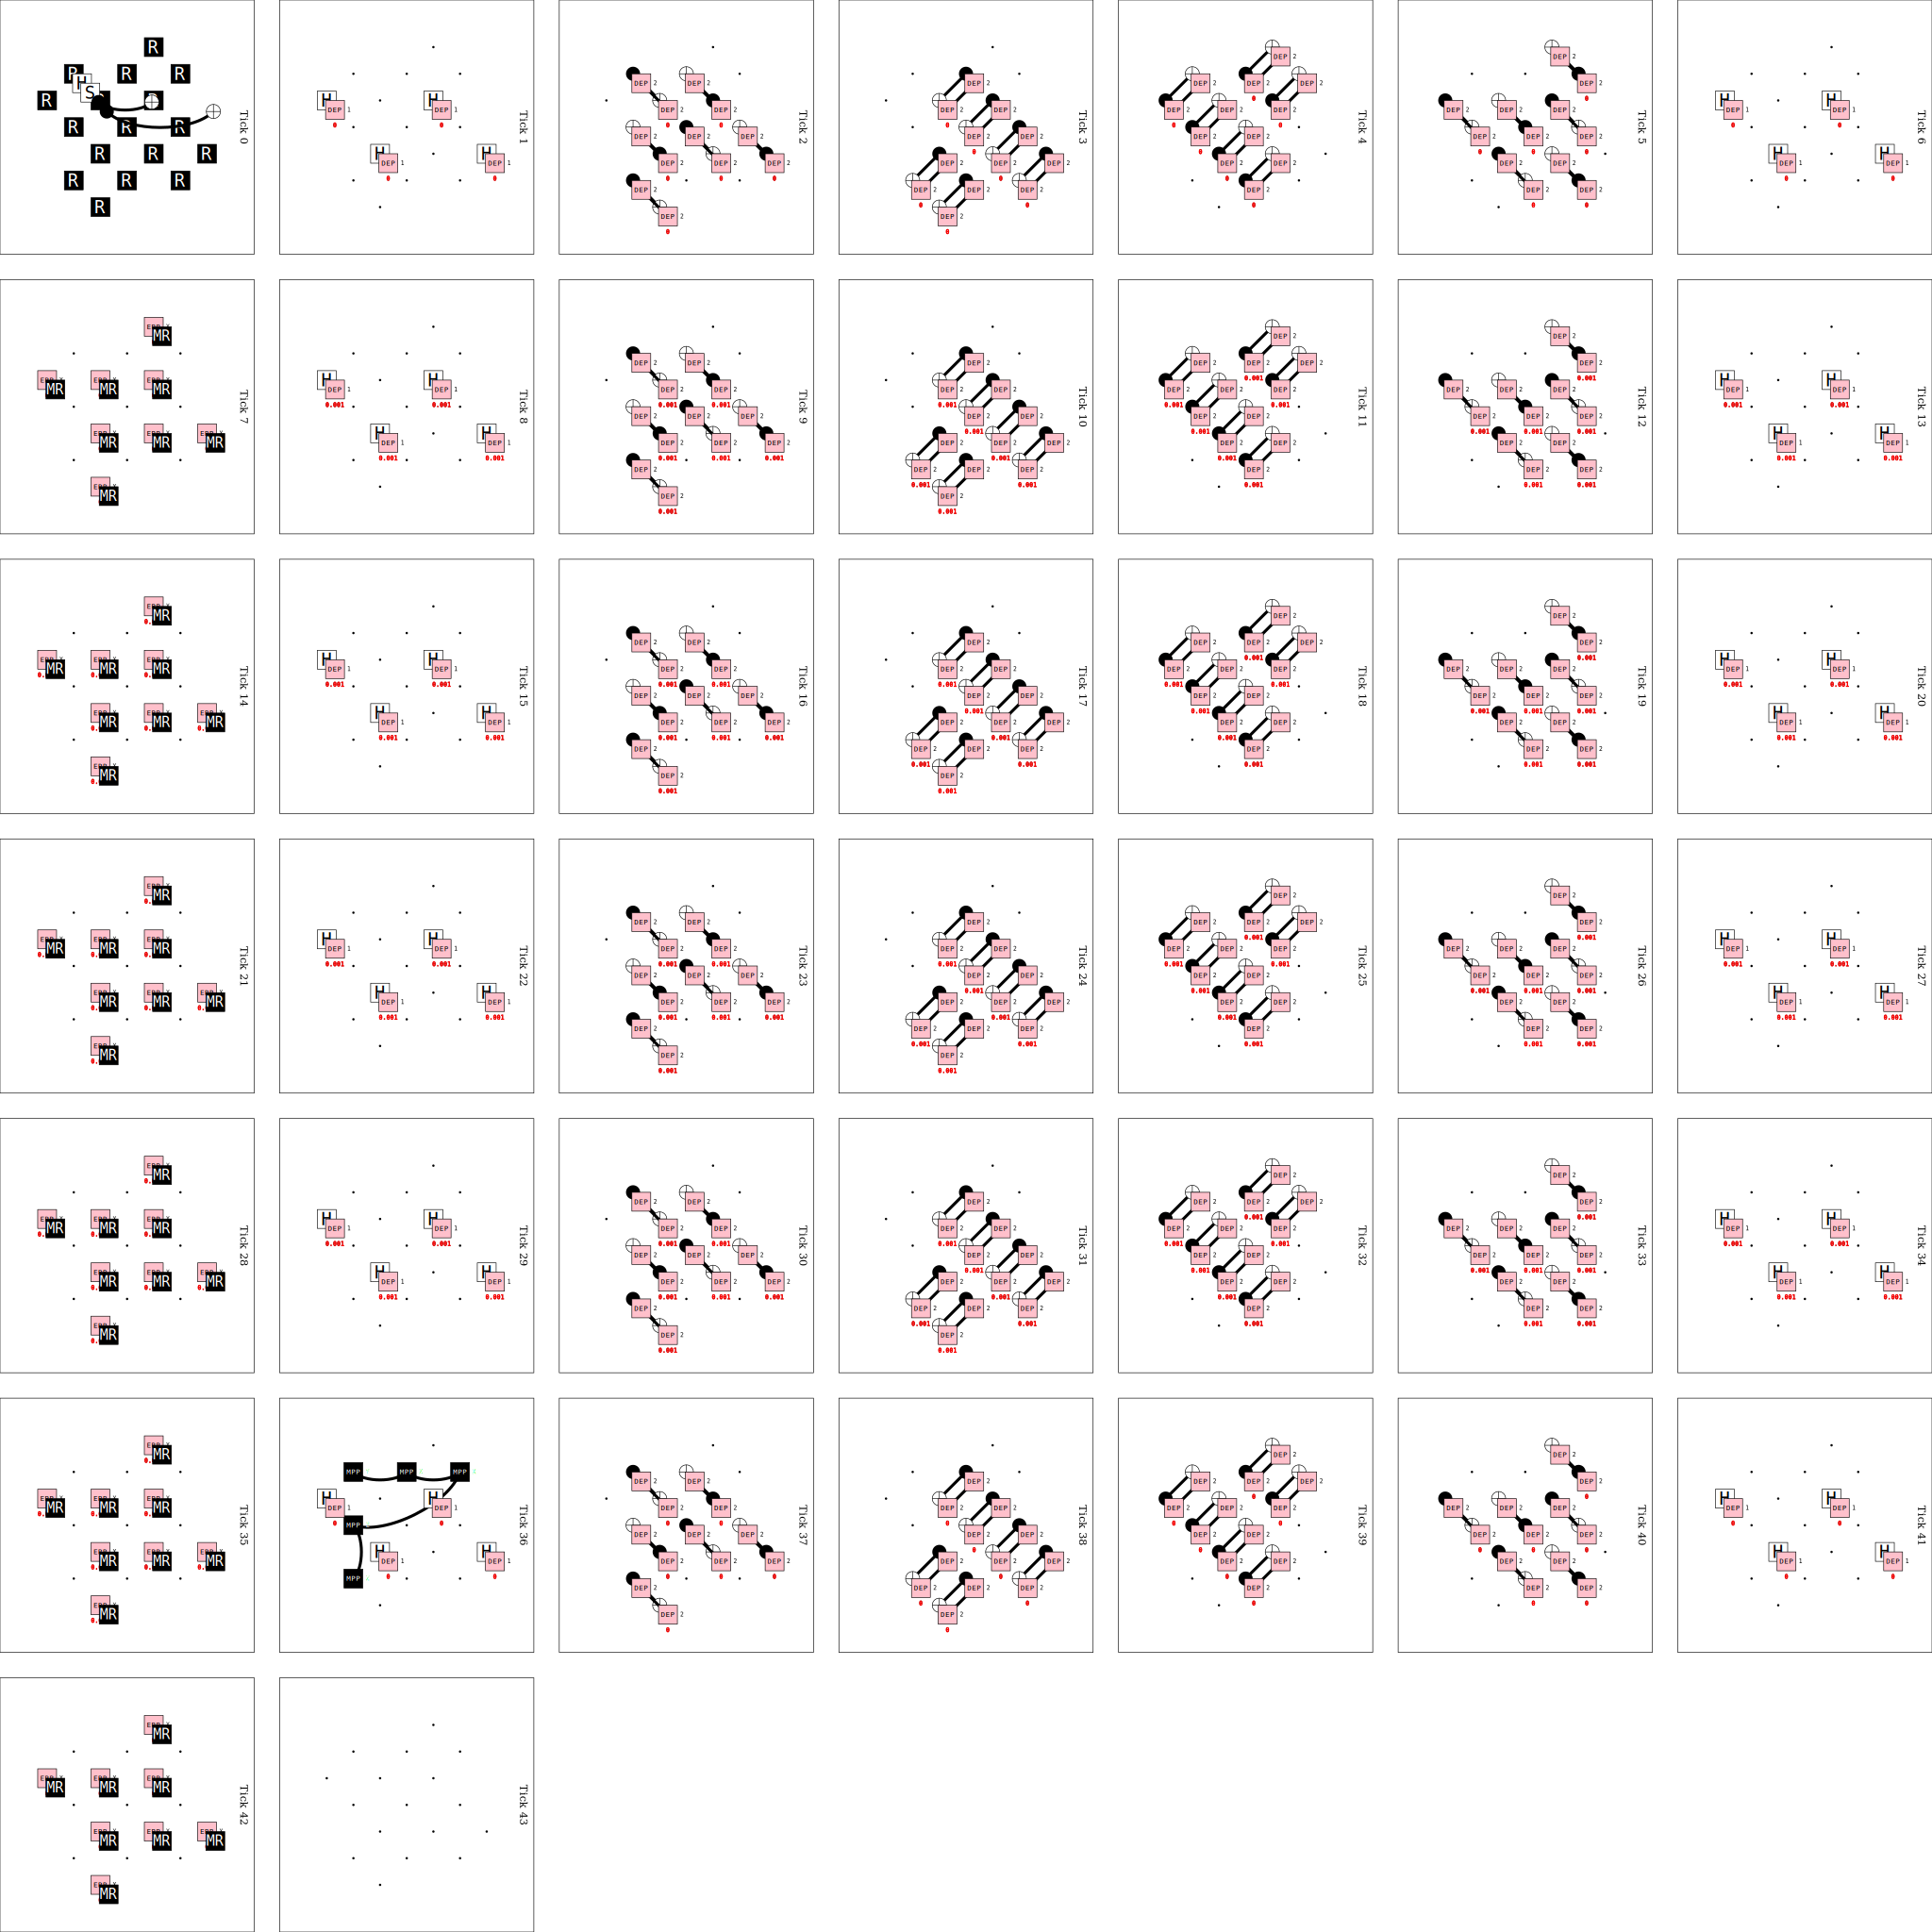

In [2]:
surface_code = sc.SurfaceCode(m=3, n=3, error_rate=0.001, off_set=0)
circuit = surface_code.S_state_preserving(rounds=5)
circuit.diagram('timeslice-svg')

In [3]:
circuit.to_file("circuits/surface_code_S_state_preserving.stim")

In [4]:
circuit.diagram('matchgraph-3d')

{"accessors":[{"bufferView":0,"byteOffset":0,"componentType":5126,"count":9,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":1,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0,0.400000005960464],"min":[-0.400000005960464,0,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":2,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0.400000005960464,0],"min":[-0.400000005960464,-0.400000005960464,0],"name":"circle_loop","type":"VEC3"},{"bufferView":3,"byteOffset":0,"componentType":5126,"count":9,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":4,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0,0.400000005960464],"min":[-0.400000005960464,0,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":5,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0.400000005960464,0],"min":[-0.400000005960464,-0.400000005960464,0],"name":"circle_loop","type":"VEC3"},{"bufferView":6,"byteOffset":0,"componentType":5126,"count":1612,"max":[24.4868335723877,16.0710678100586,23.164966583252],"min":[-4.07106828689575,-12.4868335723877,-5.16496562957764],"name":"buf_scattered_lines","type":"VEC3"},{"bufferView":7,"byteOffset":0,"componentType":5126,"count":720,"max":[16.0710678100586,24.4868335723877,23.164966583252],"min":[-12.4868335723877,-4.07106828689575,-5.16496562957764],"name":"buf_red_scattered_lines","type":"VEC3"}],"asset":{"version":"2.0"},"bufferViews":[{"buffer":0,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":1,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":2,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":3,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":4,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":5,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":6,"byteLength":19344,"byteOffset":0,"name":"buf_scattered_lines","target":34962},{"buffer":7,"byteLength":8640,"byteOffset":0,"name":"buf_red_scattered_lines","target":34962}],"buffers":[{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAM3MzD4AAAAAAAAAAMPQkD7D0JA+AAAAAPIwlrLNzMw+AAAAAMPQkL7D0JA+AAAAAM3MzL7yMBazAAAAAMHQkL7E0JC+AAAAAPLkozHNzMy+AAAAAMbQkD6/0JC+AAAAAM3MzD4AAAAA"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAAAAAADNzMw+w9CQPgAAAADD0JA+zczMPgAAAADyMJayw9CQPgAAAADD0JC+8jAWswAAAADNzMy+xNCQvgAAAADB0JC+zczMvgAAAADy5KMxv9CQvgAAAADG0JA+AAAAAAAAAADNzMw+"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,zczMPgAAAAAAAAAAw9CQPsPQkD4AAAAA8jCWss3MzD4AAAAAw9CQvsPQkD4AAAAAzczMvvIwFrMAAAAAwdCQvsTQkL4AAAAA8uSjMc3MzL4AAAAAxtCQPr/QkL4AAAAAzczMPgAAAAAAAAAA"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAM3MzD4AAAAAAAAAAMPQkD7D0JA+AAAAAPIwlrLNzMw+AAAAAMPQkL7D0JA+AAAAAM3MzL7yMBazAAAAAMHQkL7E0JC+AAAAAPLkozHNzMy+AAAAAMbQkD6/0JC+AAAAAM3MzD4AAAAA"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAAAAAADNzMw+w9CQPgAAAADD0JA+zczMPgAAAADyMJayw9CQPgAAAADD0JC+8jAWswAAAADNzMy+xNCQvgAAAADB0JC+zczMvgAAAADy5KMxv9CQvgAAAADG0JA+AAAAAAAAAADNzMw+"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,zczMPgAAAAAAAAAAw9CQPsPQkD4AAAAA8jCWss3MzD4AAAAAw9CQvsPQkD4AAAAAzczMvvIwFrMAAAAAwdCQvsTQkL4AAAAA8uSjMc3MzL4AAAAAxtCQPr/QkL4AAAAAzczMPgAAAAAAAAAA"},{"byteLength":19344,"name":"buf_scattered_lines","uri":"data:application/octet-stream;base64,AABAwAAAQEAAAEBAAABAQAAAEEEAAEBAAABAwAAAQEAAAEBAAABAQAAAEEEAAEBAAABAwAAAQEAAAEBAAABAwAAAQEAAAMBAAABAwAAAQEAAAEBAAABAwAAAQEAAAMBAAABAwAAAQEAAAEBAAABAQAAAEEEAAMBAAABAwAAAQEAAAEB

In [5]:
circuit.detector_error_model()

stim.DetectorErrorModel('''
    error(0.000133387) D0 D1
    error(0.000133387) D0 D1 D4 L1
    error(0.000133387) D0 D4
    error(6.66978e-05) D0 D4 D6 D10
    error(6.66978e-05) D0 D4 D6 L1
    error(6.66978e-05) D0 D4 D9 D12
    error(0.000200067) D0 D4 D9 L1
    error(0.000133387) D0 D4 D10 D12
    error(6.66978e-05) D0 D4 D10 L1
    error(0.000200067) D0 D4 D12 L1
    error(6.66978e-05) D0 D6 D10 D12
    error(6.66978e-05) D0 D6 D12 L1
    error(0.00259527) D0 D8
    error(0.000266738) D0 D8 D12 L1
    error(0.0003334) D0 D9
    error(0.000200067) D0 D9 D12 L1
    error(0.000133387) D0 D10
    error(6.66978e-05) D0 D10 D12 L1
    error(0.000266738) D0 D12
    error(0.0003334) D0 L1
    error(0.000533333) D1
    error(0.000266738) D1 D2
    error(6.66978e-05) D1 D2 D4 D6
    error(0.000133387) D1 D2 D4 D7
    error(0.000200067) D1 D2 D4 D15
    error(6.66978e-05) D1 D2 D6 D15
    error(6.66978e-05) D1 D2 D7
    error(0.000200067) D1 D2 D7 D15
    error(6.66978e-05) D1 D2 D15
    er

In [5]:
import time, pickle

def circuit_to_simulate(t, noise):
    surface_code = sc.SurfaceCode(5, 5, noise)
    circuit = surface_code.S_state_preserving(rounds=t)
    return circuit

noise = 0.001

tasks = [
    sinter.Task(
        circuit = circuit_to_simulate(t, noise),
        json_metadata={'t': t}
    )
    for t in range(1, 10, 2)
]

collected_stats: List[sinter.TaskStats] = sinter.collect(
    num_workers=10,
    tasks=tasks,
    decoders=['pymatching'],
    max_shots=1_000_000,
    max_errors=5000,
)

# unique_id = int(time.time() * 1000)
# filename = f"data/sfc_s_psv_{unique_id}.pkl"
# with open(filename, "wb") as f:
#     pickle.dump(collected_stats, f)
# print("Saved stats to", filename)

In [7]:
# load from data/sfc_s_psv_1757923430621.pkl

# import pickle
# with open("data/sfc_s_psv_1758096751870.pkl", "rb") as f:
#     collected_stats = pickle.load(f)
print(collected_stats)

[sinter.TaskStats(strong_id='75d15779ae5a41809a1a7ef9916fc8a9739b772854461bb129751c9fbff8a368', decoder='pymatching', json_metadata={'t': 1}, shots=1000000, seconds=0.6613909588195384), sinter.TaskStats(strong_id='ecd1490bce0efd977aefc9849cbdd82fcbe633da11b784a285f9acb5d64fe673', decoder='pymatching', json_metadata={'t': 3}, shots=1000000, errors=18, seconds=0.7254465385340154), sinter.TaskStats(strong_id='c4c43e91c05998a62e89eb529d44f5776afaf05e1b684692f9ba8333fd1de1e2', decoder='pymatching', json_metadata={'t': 5}, shots=1000000, errors=57, seconds=0.646371376235038), sinter.TaskStats(strong_id='c330d555fb591a321c7142d1fdbcbddc314d0aaba937a5118a93fd9ee3f36c63', decoder='pymatching', json_metadata={'t': 7}, shots=1000000, errors=111, seconds=0.8526576682925224), sinter.TaskStats(strong_id='a1697e1718a03beef97fd2205695531bb343b8b7f2111faaffdf8bdae7bd32a1', decoder='pymatching', json_metadata={'t': 9}, shots=1000000, errors=133, seconds=1.082867082208395)]


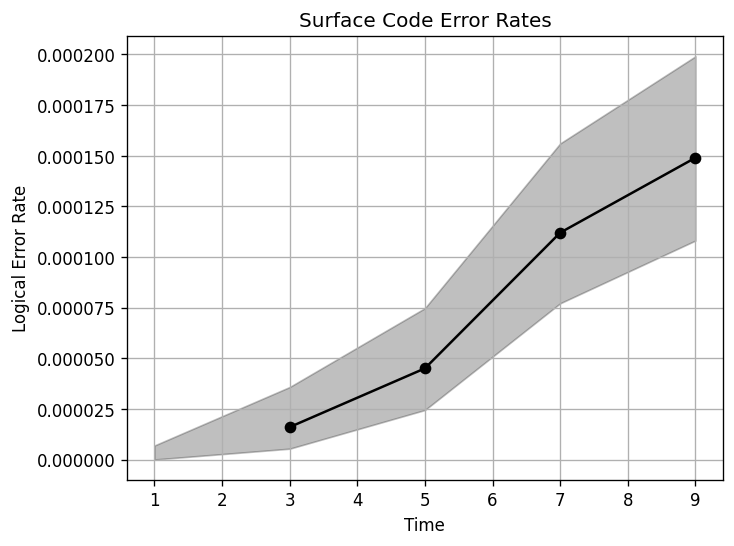

In [6]:
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_stats,
    x_func=lambda stats: stats.json_metadata['t'],
)
# ax.set_ylim(1e-6, 5e-1)
# ax.set_xlim(5e-4, 1e-2)
ax.set_title("Surface Code Error Rates")
ax.set_xlabel("Time")
ax.set_ylabel("Logical Error Rate")
ax.grid(which='major')
ax.grid(which='minor')
# ax.set_xscale("log")
# ax.set_yscale("log")
fig.set_dpi(120)  # Show it bigger

# S state preservation with code growth without post-selection

In [1]:
import numpy as np
import stim
import matplotlib.pyplot as plt
import pymatching
import sinter
from typing import List
import surface_code as sc

In [2]:
import time, pickle

def circuit_to_simulate(T, rounds, noise):
    surface_code = sc.SurfaceCode(3, 3, noise)
    circuit = surface_code.S_state_preserving_with_growth(T, rounds)
    return circuit

noise = 0.001

tasks = [
    sinter.Task(
        circuit = circuit_to_simulate(8, t, noise),
        json_metadata={'t': t}
    )
    for t in range(1, 20, 2)
]

collected_stats: List[sinter.TaskStats] = sinter.collect(
    num_workers=16,
    tasks=tasks,
    decoders=['pymatching'],
    max_shots=1_000_000,
    max_errors=5000,
)

unique_id = int(time.time() * 1000)
filename = f"data/sfc_s_grow_{unique_id}.pkl"
with open(filename, "wb") as f:
    pickle.dump(collected_stats, f)
print("Saved stats to", filename)

Saved stats to data/sfc_s_grow_1758284379574.pkl


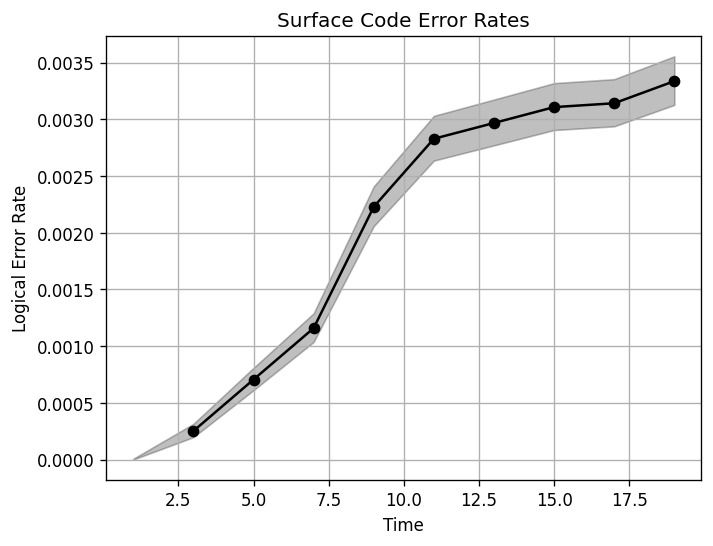

In [3]:
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_stats,
    x_func=lambda stats: stats.json_metadata['t'],
)
# ax.set_ylim(1e-6, 5e-1)
# ax.set_xlim(5e-4, 1e-2)
ax.set_title("Surface Code Error Rates")
ax.set_xlabel("Time")
ax.set_ylabel("Logical Error Rate")
ax.grid(which='major')
ax.grid(which='minor')
# ax.set_xscale("log")
# ax.set_yscale("log")
fig.set_dpi(120)  # Show it bigger

The larger code appears to be effective after one round of growing the surface code.

Note that the data on the growing point is not correct. We did not handle this boundary case.

# S state preserving with post-selection

In [5]:
import stim
import sinter
import surface_code as sc
from typing import List
import time
import pickle

def circuit_to_simulate(T, rounds, noise):
    code = sc.SurfaceCode(3, 3, noise)
    circuit = code.encoding(gate=['H', 'S'])
    if rounds < T:
        for round in range(1, rounds):
            code.syndrome_measurement(circuit, round, postselection='all')
    else:
        for round in range(1, T):
            code.syndrome_measurement(circuit, round, postselection='all')
        circuit = code.grow_code(circuit, T, rounds, code.m + 2, code.n + 2, if_measure=False)
    code.Y_measurement_noiseless(circuit)
    code.syndrome_measurement_noiseless(circuit, rounds, rec_shift=1)
    return circuit

def dem_to_simulate(T, rounds, noise):
    circuit = circuit_to_simulate(T, rounds, noise)
    dem = circuit.detector_error_model()
    return dem

noise = 0.001


tasks = [
    sinter.Task(
        circuit = circuit_to_simulate(8, t, noise),
        json_metadata={'t': t},
        postselection_mask=sinter.post_selection_mask_from_4th_coord(dem_to_simulate(8, t, noise))
    )
    for t in range(1, 20, 2)
]

collected_stats: List[sinter.TaskStats] = sinter.collect(
    num_workers=16,
    tasks=tasks,
    decoders=['pymatching'],
    max_shots=1_000_000,
    max_errors=5000,
)

unique_id = int(time.time() * 1000)
filename = f"data/sfc_s_grow_ps_{unique_id}.pkl"
with open(filename, "wb") as f:
    pickle.dump(collected_stats, f)
print("Saved stats to", filename)

Saved stats to data/sfc_s_grow_ps_1758265089127.pkl


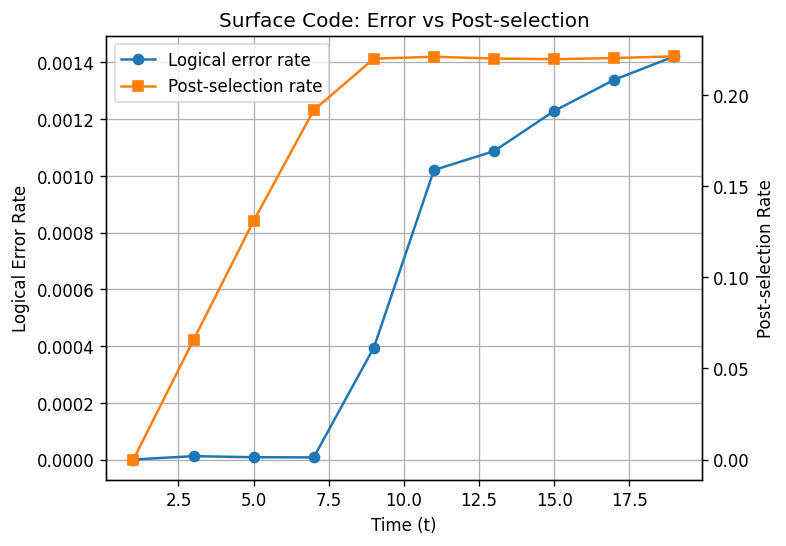

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict
import math

# collected_stats is assumed to be loaded already

# Aggregate by t
agg = defaultdict(lambda: [0, 0, 0])  # errors, discards, shots
for s in collected_stats:
    t = s.json_metadata['t']
    agg[t][0] += s.errors
    agg[t][1] += s.discards
    agg[t][2] += s.shots

t_vals = sorted(agg.keys())
err_rates = []
ps_rates = []
for t in t_vals:
    errors, discards, shots = agg[t]
    kept = shots - discards
    err_rates.append(errors / kept if kept > 0 else float('nan'))
    ps_rates.append(discards / shots if shots > 0 else float('nan'))

fig, ax = plt.subplots(1, 1)

# Left y-axis: logical error rate
l1, = ax.plot(t_vals, err_rates, marker='o', color='C0', label='Logical error rate')

# Right y-axis: post-selection rate
ax2 = ax.twinx()
l2, = ax2.plot(t_vals, ps_rates, marker='s', color='C1', label='Post-selection rate')

ax.set_title("Surface Code: Error vs Post-selection")
ax.set_xlabel("Time (t)")
ax.set_ylabel("Logical Error Rate")
ax2.set_ylabel("Post-selection Rate")

# Optional scales
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax2.set_yscale('log')

ax.grid(True, which='both', axis='both')

# Combined legend
lines = [l1, l2]
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, loc='best')

fig.set_dpi(120)
plt.show()

/var/folders/7j/yz8g10ld5n54t45czpzxpd180000gn/T/ipykernel_49075/3618212190.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


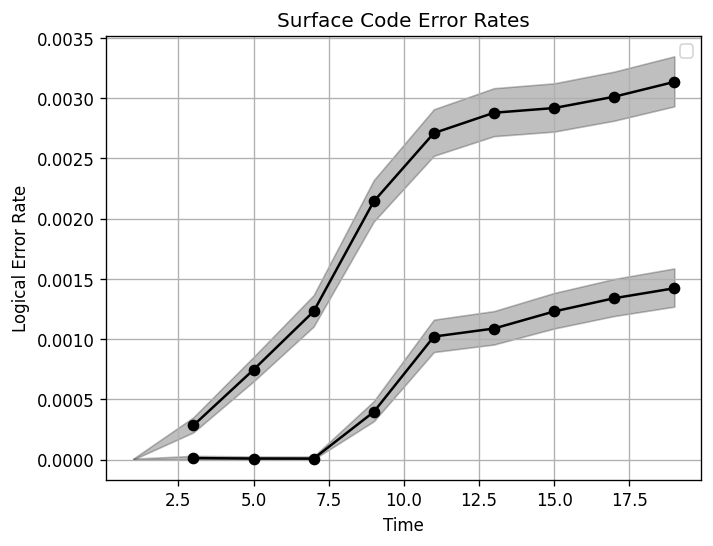

In [9]:
import pickle
import matplotlib.pyplot as plt
import sinter

# collected_stats is your existing results (with post-selection)
with open("data/sfc_s_grow_1758264314700.pkl", "rb") as f:
    collected_stats_nops = pickle.load(f)  # without post-selection

fig, ax = plt.subplots(1, 1)

# No post-selection
sinter.plot_error_rate(
    ax=ax,
    stats=collected_stats_nops,
    x_func=lambda s: s.json_metadata['t'],
    # curve_label="No post-selection",   # label for legend
    # marker='o',
    # color='C0',
)

# With post-selection
sinter.plot_error_rate(
    ax=ax,
    stats=collected_stats,
    x_func=lambda s: s.json_metadata['t'],
    # curve_label="With post-selection", # label for legend
    # marker='s',
    # color='C1',
)

ax.set_title("Surface Code Error Rates")
ax.set_xlabel("Time")
ax.set_ylabel("Logical Error Rate")
ax.grid(which='major')
ax.grid(which='minor')
ax.legend()
# ax.set_xscale("log")
# ax.set_yscale("log")
fig.set_dpi(120)
plt.show()


In [4]:
import stim
import sinter
import surface_code as sc
from typing import List
import time
import pickle

def circuit_to_simulate(T, Tps, rounds, noise):
    code = sc.SurfaceCode(3, 3, noise)
    circuit = code.encoding(gate=['H', 'S'])
    ifps = 'all'
    if rounds < T:
        for round in range(1, rounds):
            code.syndrome_measurement(circuit, round, postselection='all')
    else:
        for round in range(1, T):
            code.syndrome_measurement(circuit, round, postselection='all')
        circuit = code.grow_code(circuit, T, T + 1, code.m + 2, code.n + 2, postselection='all', if_measure=False)
        for round in range(T + 1, rounds):
            if round > Tps:
                ifps = None
            code.syndrome_measurement(circuit, round, postselection=ifps)
    code.Y_measurement_noiseless(circuit)
    code.syndrome_measurement_noiseless(circuit, rounds, rec_shift=1)
    return circuit

def dem_to_simulate(T, Tps, rounds, noise):
    circuit = circuit_to_simulate(T, Tps, rounds, noise)
    dem = circuit.detector_error_model()
    return dem

noise = 0.001


tasks = [
    sinter.Task(
        circuit = circuit_to_simulate(8, tps, t, noise),
        json_metadata={'t': t, 'tps': tps},
        postselection_mask=sinter.post_selection_mask_from_4th_coord(dem_to_simulate(8, tps, t, noise))
    )
    for t in range(1, 20, 2)
    for tps in [8, 10, 12, 14]
]

collected_stats: List[sinter.TaskStats] = sinter.collect(
    num_workers=16,
    tasks=tasks,
    decoders=['pymatching'],
    max_shots=1_000_000,
    max_errors=5000,
)

unique_id = int(time.time() * 1000)
filename = f"data/sfc_s_grow_ps_{unique_id}.pkl"
with open(filename, "wb") as f:
    pickle.dump(collected_stats, f)
print("Saved stats to", filename)

Saved stats to data/sfc_s_grow_ps_1758266941362.pkl


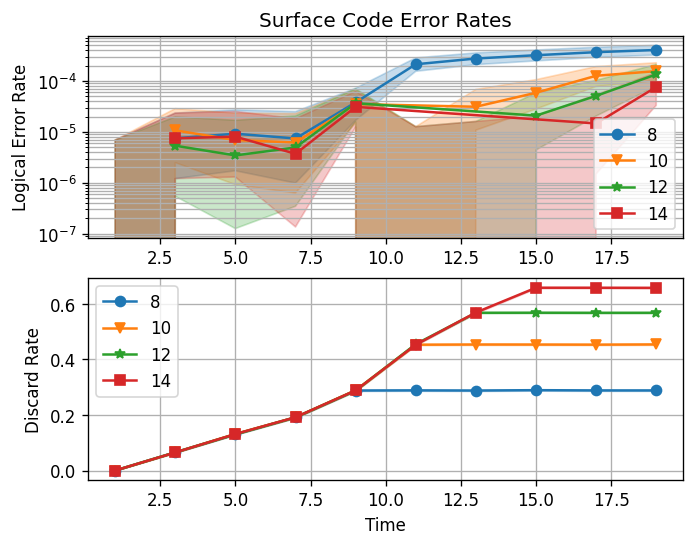

In [11]:
import pickle
import matplotlib.pyplot as plt
import sinter

fig, ax = plt.subplots(2, 1)

sinter.plot_error_rate(
    ax=ax[0],
    stats=collected_stats,
    x_func=lambda s: s.json_metadata['t'],
    group_func=lambda s: s.json_metadata['tps'],
)

sinter.plot_discard_rate(
    ax=ax[1],
    stats=collected_stats,
    x_func=lambda s: s.json_metadata['t'],
    group_func=lambda s: s.json_metadata['tps'],
)

ax[0].set_title("Surface Code Error Rates")
ax[1].set_xlabel("Time")
ax[0].set_ylabel("Logical Error Rate")
ax[1].set_ylabel("Discard Rate")
for i in range(2):
    ax[i].grid(which='major')
    ax[i].grid(which='minor')
    ax[i].legend()
# ax.set_xscale("log")
ax[0].set_yscale("log")
fig.set_dpi(120)
plt.show()